In [1]:
!pip install dvc

In [2]:
!pip install dvclive

In [3]:
!git init
!dvc init

Reinitialized existing Git repository in C:/Users/achla/Downloads/ML/dvc/dvc_churn_prediction_hyperparemeters/.git/


ERROR: failed to initiate DVC - '.dvc' exists. Use `-f` to force.


In [4]:
!git config --global user.name "amsha16"
!git config --global user.email "sharma.yashi@gmail.com"
!git status

On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
	new file:   .dvc/.gitignore
	new file:   .dvc/config
	new file:   .dvcignore

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	ChurnPrediction_HyperparameterTuningAndModelServing.ipynb
	DNC.ipynb
	data/
	untitled.txt



In [5]:
#!git remote add -f origin https://github.com/amsha16/dvc_churn_prediction_hyperparemeters.git 
!git remote set-url origin git@github.com:amsha16/dvc_churn_prediction_hyperparemeters.git
!git branch -M main 

In [6]:
!dvc remote add -d localremote C:\Users\achla\Downloads\ML\dvc_stoarge3_hytuning
!dvc remote list
!git add  .dvc/config
!git status

Setting 'localremote' as a default remote.
localremote     C:\Users\achla\Downloads\ML\dvc_stoarge3_hytuning       
(default)
On branch main

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
	new file:   .dvc/.gitignore
	new file:   .dvc/config
	new file:   .dvcignore

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	ChurnPrediction_HyperparameterTuningAndModelServing.ipynb
	DNC.ipynb
	data/
	untitled.txt



In [6]:
!git commit -m "Initialized DVC for churn prediction hyperparameter tuning 1"

!git push -u origin main

!git log

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   ChurnPrediction_HyperparameterTuningAndModelServing.ipynb
	modified:   DNC.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
branch 'main' set up to track 'origin/main'.


Everything up-to-date


commit 1f2f606638c8f82fedead816fa26fdc2bdf5a42f
Author: amsha16 <sharma.yashi@gmail.com>
Date:   Fri Sep 19 16:53:36 2025 +0530

    HPY MLEM Commit

commit 1406c264e139d876f3e442b490d6a7dacc6b02c0
Author: amsha16 <sharma.yashi@gmail.com>
Date:   Fri Sep 19 16:03:28 2025 +0530

    Initialized DVC for churn prediction hyperparameter tuning


### add project to iterative studio

In [7]:
!dvc config --global studio.token dsat_41WoMhvnVyXXyhNU0yHeZVIs1GbGbPqdgCvrzHymBmf904If8

In [8]:
!pip install scikit-learn

In [9]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [10]:
travel_churn_data = pd.read_csv('data/CustomerTravel.csv')

travel_churn_data.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [11]:
travel_churn_data = travel_churn_data.drop_duplicates()

travel_churn_data.shape

(447, 7)

In [12]:
mapper = {'Low Income': 0,'Middle Income': 1, 'High Income': 2}

travel_churn_data['AnnualIncomeClass'] = travel_churn_data['AnnualIncomeClass'].replace(mapper)

C:\Users\achla\AppData\Local\Temp\ipykernel_24676\2425412443.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  travel_churn_data['AnnualIncomeClass'] = travel_churn_data['AnnualIncomeClass'].replace(mapper)


In [13]:
categorical_features = [
    'FrequentFlyer',
    'AccountSyncedToSocialMedia', 
    'BookedHotelOrNot'
]

categorical_transformer = Pipeline(
    steps=[('encoder', OneHotEncoder(handle_unknown = 'ignore', drop = 'first'))]
)

preprocessor = ColumnTransformer(
    transformers = [('cat_tr', categorical_transformer, categorical_features)], 
    remainder = StandardScaler()
)

In [14]:
X = travel_churn_data.drop(labels = ['Target'], axis = 1)
 
y = travel_churn_data['Target']
 
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 124)

In [15]:
!pip install optuna

In [16]:
!pip install xgboost

In [17]:
from xgboost.sklearn import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def objective(trial):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 15, log = True),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log = True),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500, log = True),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10, log = True),
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log = True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0,log = True),
    }

    xgb_model = XGBClassifier(**params)
    
    pipe_xgb = Pipeline(steps = [('preprocessor', preprocessor), ('classifier', xgb_model )])
    pipe_xgb.fit(X_train, y_train)

    predictions = pipe_xgb.predict(X_test)
    test_f1_score = f1_score(y_test, predictions)

    return test_f1_score

In [18]:
import optuna

study = optuna.create_study(direction = 'maximize')

print(f"Sampler is {study.sampler.__class__.__name__}")

[I 2025-09-28 14:09:40,618] A new study created in memory with name: no-name-d40e1db0-75cb-4d93-8df9-c0929a2ffdb3


Sampler is TPESampler


In [19]:
from dvclive.optuna import DVCLiveCallback

study.optimize(objective, n_trials = 32, callbacks = [DVCLiveCallback()])

C:\Users\achla\AppData\Local\Programs\Python\Python313\Lib\site-packages\dvclive\monitor_system.py:11: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  from pynvml import (
[I 2025-09-28 14:10:06,071] Trial 0 finished with value: 0.6181818181818182 and parameters: {'max_depth': 14, 'learning_rate': 0.23517186332102857, 'n_estimators': 66, 'min_child_weight': 2, 'lambda': 0.11619453689424977, 'alpha': 0.04548692648542376}. Best is trial 0 with value: 0.6181818181818182.
[I 2025-09-28 14:10:14,857] Trial 1 finished with value: 0.5882352941176471 and parameters: {'max_depth': 2, 'learning_rate': 0.5341815280208947, 'n_estimators': 298, 'min_child_weight': 6, 'lambda': 0.054655950638889325, 'alpha': 1.0427974146161614}. Best is trial 0 with value: 0.6181818181818182.
[I 2025-09-28 14:10:20,985] Trial 2 finished with value: 0.5531

In [21]:
!dvc exp show

+-----------------------------------------------------------------------------------------------------------------------------------------+
| Experiment               | Created      |  metric | max_depth | learning_rate | n_estimators | min_child_weight | lambda    | alpha     |
|--------------------------+--------------+---------+-----------+---------------+--------------+------------------+-----------+-----------|
| workspace                | -            | 0.66667 | 13        | 0.1231        | 499          | 4                | 0.98391   | 0.35697   |
| main                     | Sep 19, 2025 | 0.65455 | 13        | 0.34704       | 82           | 4                | 2.7994    | 0.039984  |
| \u251c\u2500\u2500 d40e986 [sable-agas] | 02:13 PM     | 0.66667 | 13        | 0.1231        | 499          | 4                | 0.98391   | 0.35697   |
| \u251c\u2500\u2500 c39c9c1 [surly-taus] | 02:13 PM     | 0.62963 | 6         | 0.20103       | 327          | 5                | 0.3144    | 0.

In [22]:
!dvc exp show --sort-by metric --sort-order desc

+-----------------------------------------------------------------------------------------------------------------------------------------+
| Experiment               | Created      |  metric | max_depth | learning_rate | n_estimators | min_child_weight | lambda    | alpha     |
|--------------------------+--------------+---------+-----------+---------------+--------------+------------------+-----------+-----------|
| workspace                | -            | 0.66667 | 13        | 0.1231        | 499          | 4                | 0.98391   | 0.35697   |
| main                     | Sep 19, 2025 | 0.65455 | 13        | 0.34704       | 82           | 4                | 2.7994    | 0.039984  |
| \u251c\u2500\u2500 d9457fd [glued-tier] | 02:12 PM     | 0.68966 | 4         | 0.082152      | 360          | 4                | 0.82825   | 0.096791  |
| \u251c\u2500\u2500 336e6ae [dormy-hunt] | 02:12 PM     | 0.68966 | 6         | 0.062407      | 495          | 4                | 0.83453   | 0.

In [23]:
!dvc exp push origin --all-commits

Experiment upset-bunt, tubal-gobs, bandy-skis, bijou-arks, rooky-zhos, 
glued-tier, alary-sacs, front-toby, welsh-tier, cynic-noma, afoul-saut, 
picky-hack, sarky-sons, surly-taus, pappy-hull, mothy-weld, enate-uvea, 
kinky-dawn, riled-souk, saved-flap, riled-trug, melic-azan, tinct-slew, 
salic-prad, fetid-suqs, blest-tipi, sable-agas, store-obit, ready-yoni, 
dormy-hunt, spicy-chiv and nervy-dirk are up to date on Git remote 'origin'.
Pushed experiment areal-craw, volar-scud, beige-leak, birch-gaby, batty-emeu, 
wally-puns, loved-rugs, ready-dart, nasty-loof, unmet-zack, rapid-jigs, 
mired-gram, irony-sima, yucky-tuns, gluey-harl, laigh-gale, yucky-vent, 
frore-ewes, bumpy-bout, lousy-ambo, baser-shay, pious-wort, taunt-emus, 
pesky-cogs, fiery-lien, group-kago, gamey-reif, kacha-yawl, peart-hock, 
mated-zhos, soled-tale, techy-deys, valid-chic, handy-akes, swept-genu, 
tenth-sere, piney-gang, naked-hunk, seely-jinn, third-yawl, mangy-merk, 
dicey-sham, wacky-stir, treen-rube, birch-

In [24]:
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 32
Best trial:
  Value: 0.6896551724137931
  Params: 
    max_depth: 6
    learning_rate: 0.06240657648173549
    n_estimators: 495
    min_child_weight: 4
    lambda: 0.8345267126037174
    alpha: 0.09667359351679769


In [25]:
params = trial.params

In [26]:
xgb_model = XGBClassifier(**params)
    
pipe_xgb = Pipeline(steps = [('preprocessor', preprocessor), ('classifier', xgb_model )])
pipe_xgb.fit(X_train, y_train)

predictions = pipe_xgb.predict(X_test)

In [27]:
print('Test accuracy score: ', accuracy_score(y_test, predictions))
print('Test precision score: ', precision_score(y_test, predictions))
print('Test recall score: ', recall_score(y_test, predictions))
print('Test f1 score:', f1_score(y_test, predictions))

Test accuracy score:  0.8
Test precision score:  0.5882352941176471
Test recall score:  0.8333333333333334
Test f1 score: 0.6896551724137931


In [28]:
pip install mlem

Note: you may need to restart the kernel to use updated packages.


### Saving the MLEM object with metadata
pipe_xgb
pipe_xgb.mlem >>

artifacts:
  data:
    hash: 8ab8f59a646d49a26deeab9fe7be65e8
    size: 540853
    uri: pipe_xgb
call_orders:
  predict:
  - - model
    - predict
  predict_proba:
  - - model
    - predict_proba
object_type: model
processors:
  model:
    methods:
      predict:
        args:
        - name: X
          type_:
            columns:
            - ''
            - Age
            - FrequentFlyer
            - AnnualIncomeClass
            - ServicesOpted
            - AccountSyncedToSocialMedia
            - BookedHotelOrNot
            dtypes:
            - int64
            - int64
            - object
            - int64
            - int64
            - object
            - object
            index_cols:
            - ''
            type: dataframe
        name: predict
        returns:
          dtype: int64
          shape:
          - null
          type: ndarray
        varkw: params
      predict_proba:
        args:
        - name: X
          type_:
            columns:
            - ''
            - Age
            - FrequentFlyer
            - AnnualIncomeClass
            - ServicesOpted
            - AccountSyncedToSocialMedia
            - BookedHotelOrNot
            dtypes:
            - int64
            - int64
            - object
            - int64
            - int64
            - object
            - object
            index_cols:
            - ''
            type: dataframe
        name: predict_proba
        returns:
          dtype: float32
          shape:
          - null
          - 2
          type: ndarray
        varkw: params
    type: sklearn_pipeline
requirements:
- module: numpy
  version: 2.3.3
- module: pandas
  version: 2.3.2
- module: sklearn
  package_name: scikit-learn
  version: 1.7.2
- package_name: libgomp1
  type: unix
- module: xgboost
  version: 3.0.5


In [29]:
from mlem.api import save

save(pipe_xgb, 'models/pipe_xgb', sample_data = X_test)

MlemModel(location=Location(path='C:/Users/achla/Downloads/ML/dvc/dvc_churn_prediction_hyperparemeters/models/pipe_xgb.mlem', project=None, rev=None, uri='file://C:/Users/achla/Downloads/ML/dvc/dvc_churn_prediction_hyperparemeters/models/pipe_xgb.mlem', project_uri=None, fs=<fsspec.implementations.local.LocalFileSystem object at 0x000001D667B39940>), params={}, artifacts={'data': LocalArtifact(uri='pipe_xgb', size=540853, hash='8ab8f59a646d49a26deeab9fe7be65e8')}, requirements=Requirements(__root__=[InstallableRequirement(module='numpy', version='2.3.3', package_name=None, extra_index=None, source_url=None, vcs=None, vcs_commit=None), InstallableRequirement(module='pandas', version='2.3.2', package_name=None, extra_index=None, source_url=None, vcs=None, vcs_commit=None), InstallableRequirement(module='sklearn', version='1.7.2', package_name='scikit-learn', extra_index=None, source_url=None, vcs=None, vcs_commit=None), UnixPackageRequirement(package_name='libgomp1'), InstallableRequirem

In [30]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1])

In [31]:
X_test.iloc[3].values

array([np.int64(30), 'No Record', np.int64(0), np.int64(3), 'Yes', 'No'],
      dtype=object)

In [32]:
X_test.iloc[12].values

array([np.int64(37), 'Yes', np.int64(0), np.int64(3), 'Yes', 'Yes'],
      dtype=object)

Load the model and use for prediction
First didnt churn, second did

In [33]:
from mlem.api import load

model = load('models/pipe_xgb')  

features = [
    'Age', 'FrequentFlyer', 'AnnualIncomeClass', 
    'ServicesOpted', 'AccountSyncedToSocialMedia', 'BookedHotelOrNot'
]

sample_df = pd.DataFrame([
    [37, 'Yes', 0, 1, 'No', 'Yes'], 
    [34, 'Yes', 0, 0, 'Yes', 'No']
], columns = features)

y_pred = model.predict(sample_df)

print(y_pred)

[0 1]


Imvoking MLEL from command Line
mlem apply models\pipe_xgb test.csv  --method predict --import --import-type "pandas[csv]"
⏳️ Importing object from file://C:/Users//Downloads/ML/dvc/dvc_churn_prediction_hyperparemeters/test.csv
⏳️ Loading model from file://C:/Users//Downloads/ML/dvc/dvc_churn_prediction_hyperparemeters/models/pipe_xgb.mlem
🍏 Applying `predict` method...
[1, 0]

Install FastAPI
pip install mlem[fastapi]

This will help in exposing model via the REST endpoint

mlem serve fastapi --model models\pipe_xgb --host 0.0.0.0 --port 8080

⏳️ Loading model from file://C:/Users//Downloads/ML/dvc/dvc_churn_prediction_hyperparemeters/models/pipe_xgb.mlem
Starting fastapi server...
🖇️  Adding route for /predict
🖇️  Adding route for /predict_proba
Checkout openapi docs at <http://0.0.0.0:8080/docs>
INFO:     Started server process [21896]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8080 (Press CTRL+C to quit)

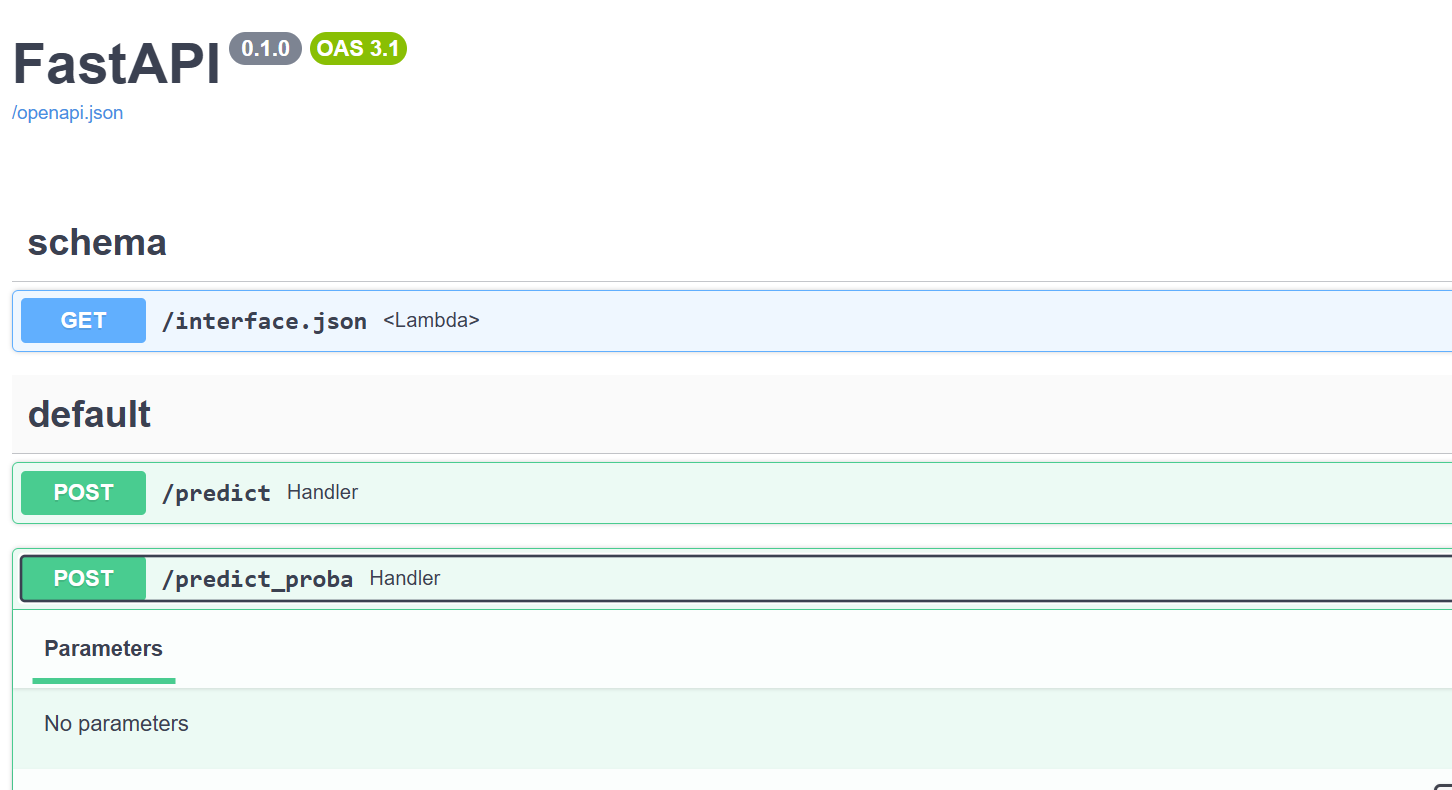

You can use docker and mlem[docker] to containerise the model
INSTALL Docker and mlem[docker]
CREATE BUILDER
mlem declare builder docker_builder.mlem --image.name mlem-model --daemon.host ""  --server fastapi

will generate docker_builder.mlem

USE builder to build the image
mlem build --load docker_builder.mlem --model ../models/pipe.xgb 
generates the dockerfile 

RUN THE IMAGE    
mlem docker run docker_container docker_app.mlem --model ..models\pipe_xgb --server fastapi --ports.0 8080:8080



In [32]:
!git add .

In [34]:
!git commit -m "HPY MLEM Commit"

[main 1f2f606] HPY MLEM Commit
 9 files changed, 6834 insertions(+)
 create mode 100644 .ipynb_checkpoints/ChurnPrediction_HyperparameterTuningAndModelServing-checkpoint.ipynb
 create mode 100644 .ipynb_checkpoints/DNC-checkpoint.ipynb
 create mode 100644 ChurnPrediction_HyperparameterTuningAndModelServing.ipynb
 create mode 100644 DNC.ipynb
 create mode 100644 data/CustomerTravel.csv
 create mode 100644 dvc.yaml
 create mode 100644 dvclive-optuna/metrics.json
 create mode 100644 dvclive-optuna/params.yaml
 create mode 100644 untitled.txt


In [35]:
!git push -u origin 

branch 'main' set up to track 'origin/main'.

To https://github.com/amsha16/dvc_churn_prediction_hyperparemeters.git


   1406c26..1f2f606  main -> main
